In [1]:
import pickle
from matplotlib import colors
import matplotlib.pyplot as plt
from map_engine.map_generator import map
from quest_engine.quest_generator import *
from encounter_engine.world_encounters import *
from quest_engine.freytags_fitness import freytags

In [2]:
nw = map()
nw.populate_map(n_locations=1024, name="terrain", relaxed=True, k=100)
nw.populate_map(n_locations=4096, name="civilisation", relaxed=True, k=250)
nw.populate_map(n_locations=1024, name="story_act", relaxed=True, k=250)
nw.populate_map(n_locations=1024, name="threat", relaxed=True, k=100)

nw.attribute_view(seed_1=24, seed_2=34,
                  map_name="terrain", view_name="terrain")
nw.attribute_view(seed_1=98, seed_2=50, map_name="civilisation",
                  view_name="civilisation", double=False)
nw.attribute_view(seed_1=34, seed_2=34, map_name="threat",
                  view_name="threat", double=False)
nw.attribute_view(seed_1=16, seed_2=16, map_name="story_act",
                  view_name="story_act", double=False)

nw.attribute_centroids("civilisation")
nw.attribute_centroids("terrain")
nw.land_mask()

with open('map_nw', 'wb') as f:
    pickle.dump(nw, f)

with open("map_nw", "rb") as f:
    nw = pickle.load(f)

/Users/cetiners/Desktop/Thesis/human_error/map_engine/map_attributer.py:104: RuntimeWarning: invalid value encountered in true_divide
  average = sum_/count


Centroids attributed, attributes centroited
Centroids attributed, attributes centroited


In [3]:
params = {
    "gens": 100,
    "pop_size": 200,
    "mu_p": .5,
    "xo": "pmx",
    "mutation": "random_point",
    "print_it": True
}

ql = quest_library(nw,shelf_size=500,params=params)

Best ind in gen 1 is -3000
Best ind in gen 2 is -2000
Best ind in gen 3 is -2000
Best ind in gen 4 is -1000
Best ind in gen 5 is -1000
Best ind in gen 6 is -1000
Best ind in gen 7 is 0
Found the required individual on gen 7
Best ind in gen 1 is -4000
Best ind in gen 2 is -3000
Best ind in gen 3 is -1000
Best ind in gen 4 is -1000
Best ind in gen 5 is -1000
Best ind in gen 6 is -1000
Best ind in gen 7 is -1000
Best ind in gen 8 is -1000
Best ind in gen 9 is -1000
Best ind in gen 10 is 0
Found the required individual on gen 10
Best ind in gen 1 is -4000
Best ind in gen 2 is -1000
Best ind in gen 3 is -1000
Best ind in gen 4 is -1000
Best ind in gen 5 is -1000
Best ind in gen 6 is 0
Found the required individual on gen 6
Best ind in gen 1 is -1000
Best ind in gen 2 is -3000
Best ind in gen 3 is -1000
Best ind in gen 4 is -1000
Best ind in gen 5 is 0
Found the required individual on gen 5
Best ind in gen 1 is -1000
Best ind in gen 2 is 0
Found the required individual on gen 2
Best ind in g

In [5]:
with open("quest_library", "wb") as f:
    ql = pickle.dump(ql,f)


with open("quest_library", "rb") as f:
    ql = pickle.load(f)

In [6]:
quest_line = ql.curate(5,max_act=0)

Generation:  0
Fitness:  -4000
Generation:  1
Fitness:  -4000
Generation:  2
Fitness:  -3000
Generation:  3
Fitness:  -3000
Generation:  4
Fitness:  -3000
Generation:  5
Fitness:  -1000
Generation:  6
Fitness:  -1000
Generation:  7
Fitness:  -2000
Generation:  8
Fitness:  -2000
Generation:  9
Fitness:  -2000
Generation:  10
Fitness:  -2000
Generation:  11
Fitness:  -2000
Generation:  12
Fitness:  -2000
Generation:  13
Fitness:  -1000
Generation:  14
Fitness:  -2000
Generation:  15
Fitness:  -2000
Generation:  16
Fitness:  -2000
Generation:  17
Fitness:  -2000
Generation:  18
Fitness:  -2000
Generation:  19
Fitness:  -2000
Generation:  20
Fitness:  -1000
Generation:  21
Fitness:  -1000
Generation:  22
Fitness:  -1000
Generation:  23
Fitness:  -1000
Generation:  24
Fitness:  -1000
Generation:  25
Fitness:  0
Found the required quest line on gen 26


/var/folders/b0/myrlwrn92tx10wp6gb5y7c540000gn/T/ipykernel_88053/599948654.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


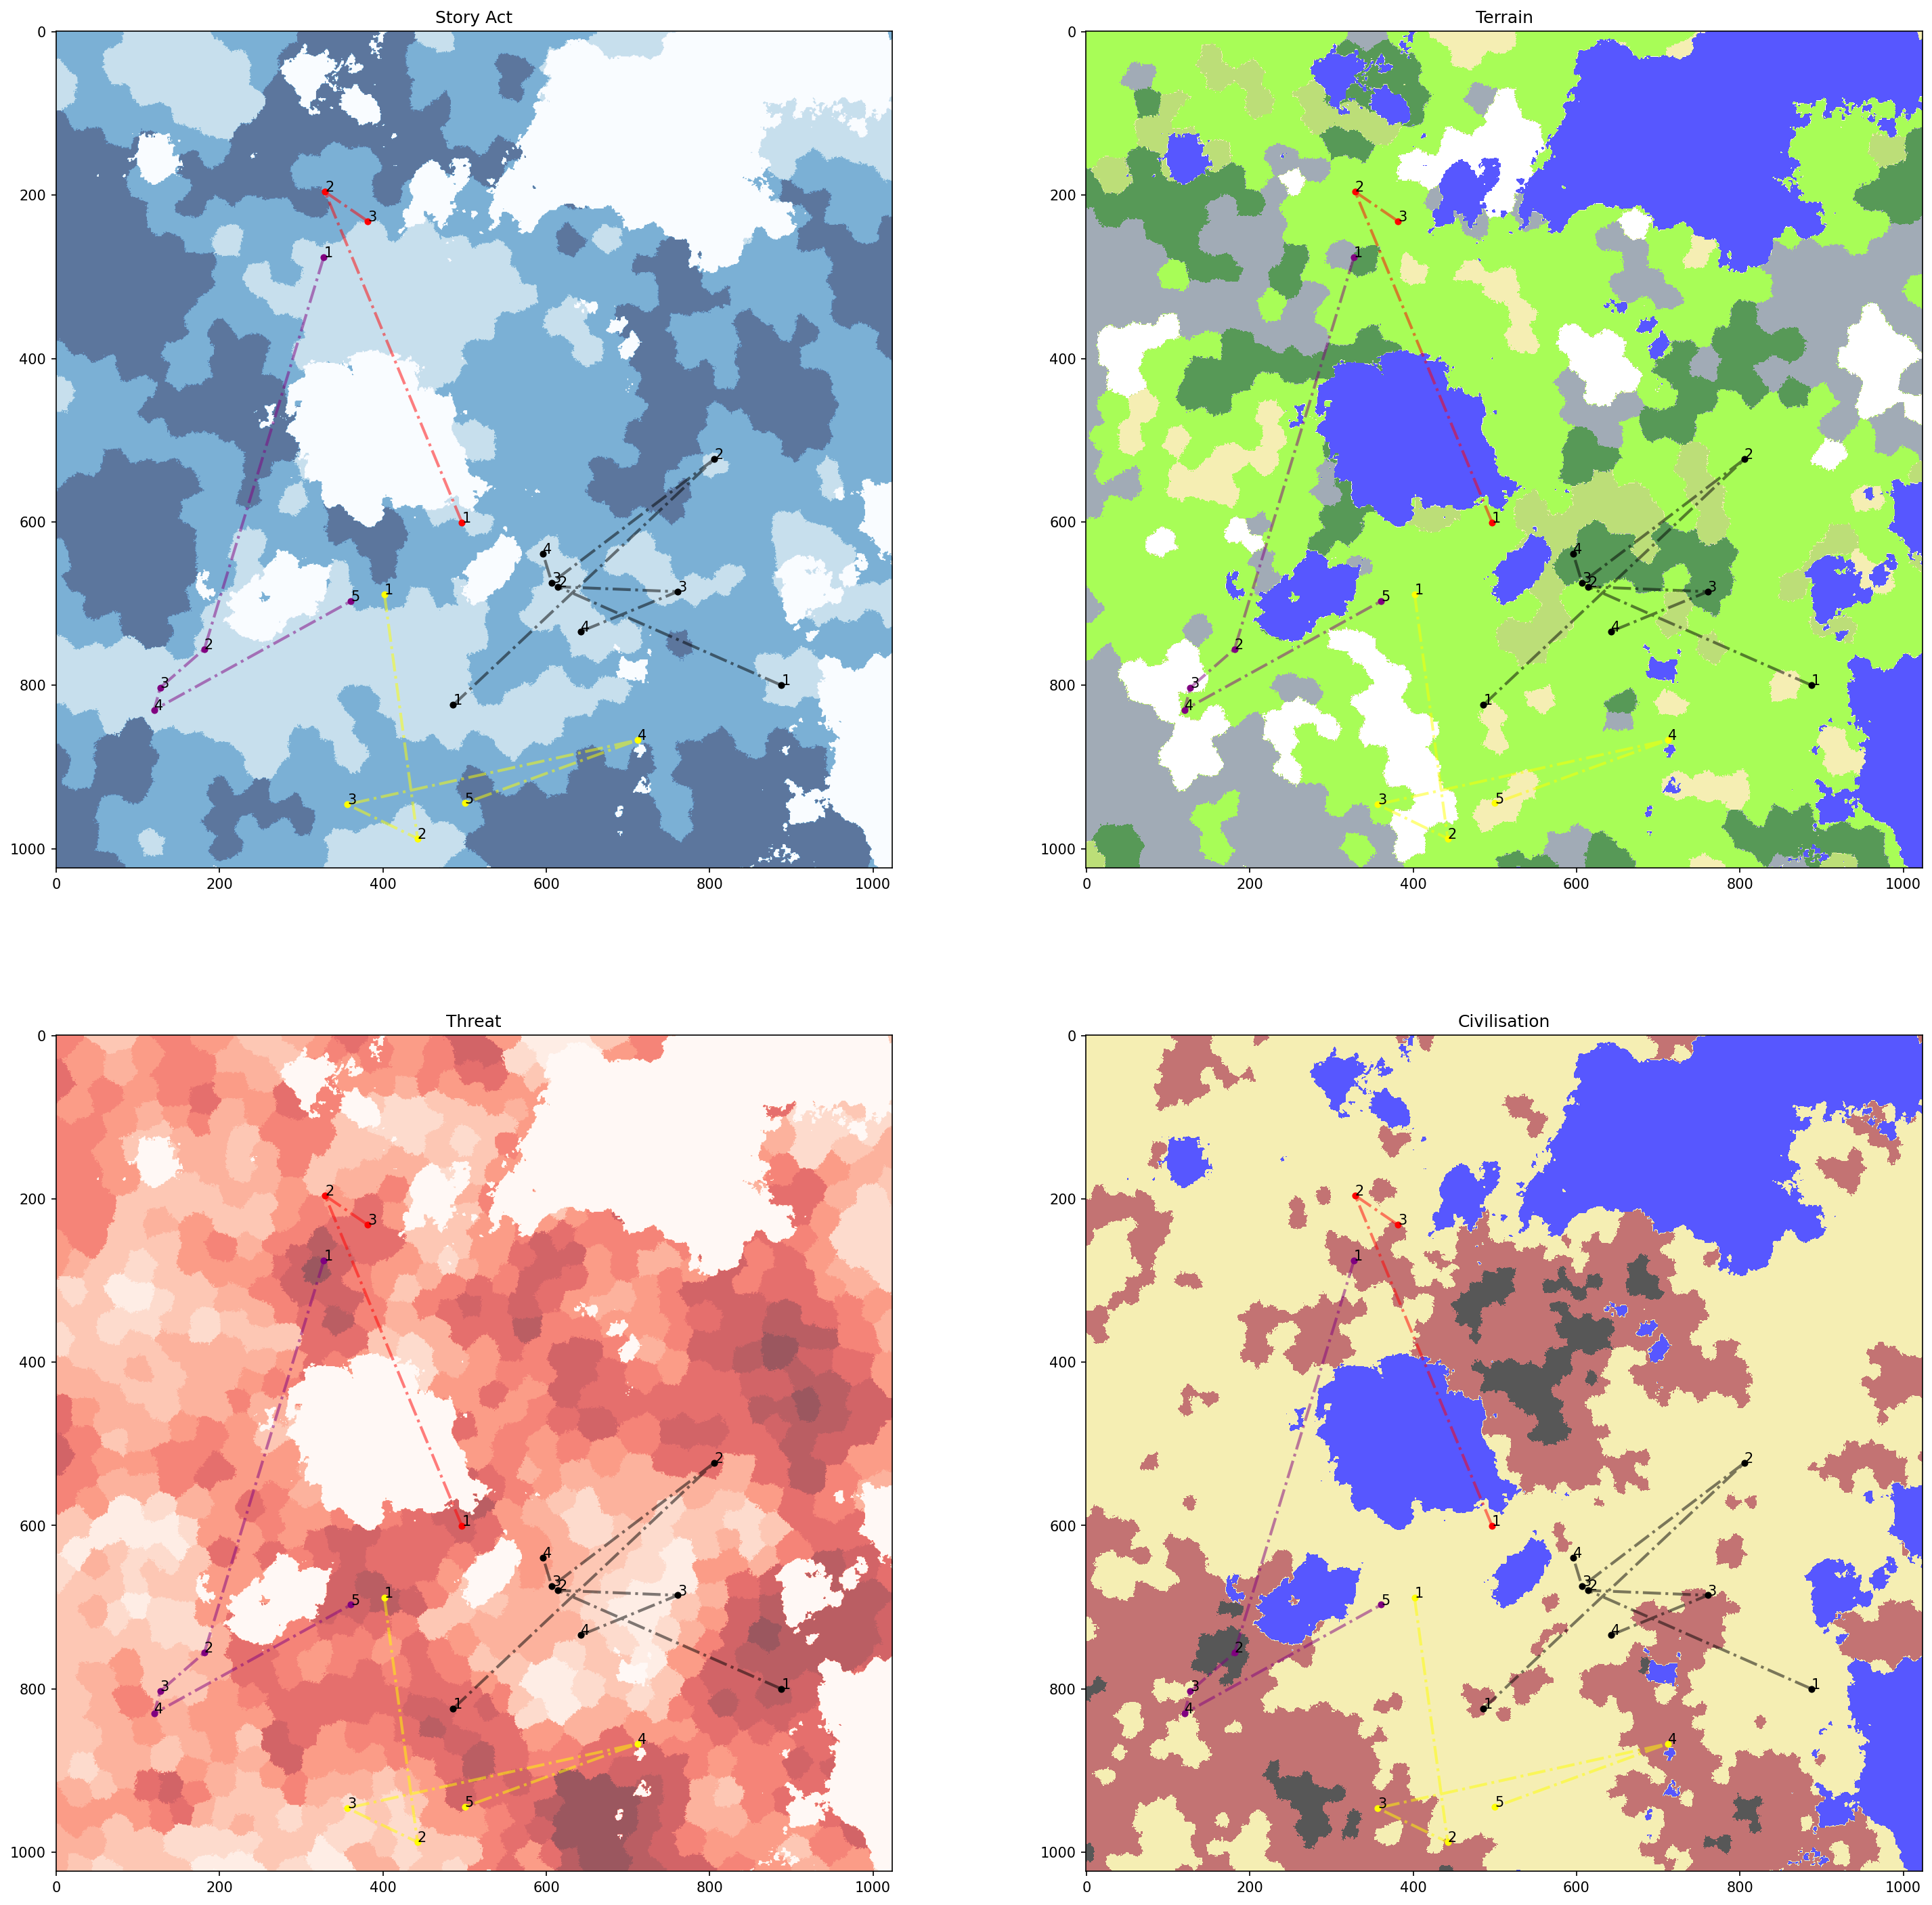

In [7]:
cmap = colors.ListedColormap(
    ["blue", "white", "yellowgreen", "khaki", "lawngreen", "slategrey", "darkgreen"])
cmap_arcs = colors.ListedColormap(
    ["blue", "khaki", "khaki", "khaki", "khaki", "khaki", "khaki", "brown", "brown", "brown", "black", ])

q_colors = ["red","orange","yellow","purple","black"]

ter = nw.views["terrain"].copy()
civ = nw.views["civilisation"].copy()
thr = nw.views["threat"].copy()
arc = nw.views["story_act"].copy()

fig, ax = plt.subplots(2, 2)
fig.set_dpi(150)
fig.set_size_inches(24, 24)

ax[0, 1].imshow(ter.T, cmap=cmap, alpha=.66)
ax[0, 1].set_title("Terrain")

i = 0
for q in quest_line[0]:
    
    ax[0, 1].scatter([i[0] for i in q.path], [i[1] for i in q.path], color=q_colors[i], s=15)
    ax[0, 1].plot([i[0] for i in q.path], [i[1] for i in q.path], color=q_colors[i],linestyle="-.",linewidth=2, alpha=.5)
    i += 1

    for i in range(len(q.path)):
        ax[0, 1].annotate(i+1,(q.path[i][0], q.path[i][1]))
  

ax[1, 1].imshow(civ.T, cmap=cmap_arcs, alpha=0.66)
ax[1, 1].set_title("Civilisation")

i = 0
for q in quest_line[0]:

    ax[1, 1].scatter([i[0] for i in q.path], [i[1] for i in q.path], color=q_colors[i], s=15)
    ax[1, 1].plot([i[0] for i in q.path], [i[1] for i in q.path],color=q_colors[i],linestyle="-.",linewidth=2, alpha=.5)
    i += 1

    for i in range(len(q.path)):
        ax[1, 1].annotate(i+1,(q.path[i][0], q.path[i][1]))

ax[1, 0].imshow(thr.T, cmap="Reds", alpha=0.66)
ax[1, 0].set_title("Threat")

i=0
for q in quest_line[0]:
    ax[1, 0].scatter([i[0] for i in q.path], [i[1] for i in q.path], color=q_colors[i], s=15)
    ax[1, 0].plot([i[0] for i in q.path], [i[1] for i in q.path],color=q_colors[i],linestyle="-.",linewidth=2, alpha=.5)
    i += 1

    for i in range(len(q.path)):
        ax[1, 0].annotate(i+1,(q.path[i][0], q.path[i][1]))

ax[0, 0].imshow(arc.T, cmap="Blues", alpha=0.66)
ax[0, 0].set_title("Story Act")

i=0
for q in quest_line[0]:
    ax[0, 0].scatter([i[0] for i in q.path], [i[1] for i in q.path], color=q_colors[i], s=15)
    ax[0, 0].plot([i[0] for i in q.path], [i[1] for i in q.path], color=q_colors[i],linestyle="-.",linewidth=2, alpha=.5)

    i += 1

    for i in range(len(q.path)):
        ax[0, 0].annotate(i+1,(q.path[i][0], q.path[i][1]))


fig.show()
